In [1]:
# import the necessary packages
from imutils.object_detection import non_max_suppression
import numpy as np
import argparse
import time
import cv2
 
# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str,
#     help="path to input image")
# ap.add_argument("-east", "--east", type=str,
#     help="path to input EAST text detector")
# ap.add_argument("-c", "--min-confidence", type=float, default=0.5,
#     help="minimum probability required to inspect a region")
# ap.add_argument("-w", "--width", type=int, default=320,
#     help="resized image width (should be multiple of 32)")
# ap.add_argument("-e", "--height", type=int, default=320,
#     help="resized image height (should be multiple of 32)")
# args = vars(ap.parse_args())

In [2]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str,
#     help="path to input image")
# ap.add_argument("-east", "--east", type=str,
#     help="path to input EAST text detector")
# ap.add_argument("-c", "--min-confidence", type=float, default=0.5,
#     help="minimum probability required to inspect a region")
# ap.add_argument("-w", "--width", type=int, default=320,
#     help="resized image width (should be multiple of 32)")
# ap.add_argument("-e", "--height", type=int, default=320,
#     help="resized image height (should be multiple of 32)")
# args = vars(ap.parse_args())

In [3]:
import cv2
import numpy as np

In [4]:
def decode(scores, geometry, scoreThresh):
    detections = []
    confidences = []

    ############ CHECK DIMENSIONS AND SHAPES OF geometry AND scores ############
    assert len(scores.shape) == 4, "Incorrect dimensions of scores"
    assert len(geometry.shape) == 4, "Incorrect dimensions of geometry"
    assert scores.shape[0] == 1, "Invalid dimensions of scores"
    assert geometry.shape[0] == 1, "Invalid dimensions of geometry"
    assert scores.shape[1] == 1, "Invalid dimensions of scores"
    assert geometry.shape[1] == 5, "Invalid dimensions of geometry"
    assert scores.shape[2] == geometry.shape[2], "Invalid dimensions of scores and geometry"
    assert scores.shape[3] == geometry.shape[3], "Invalid dimensions of scores and geometry"
    height = scores.shape[2]
    width = scores.shape[3]
    for y in range(0, height):

        # Extract data from scores
        scoresData = scores[0][0][y]
        x0_data = geometry[0][0][y]
        x1_data = geometry[0][1][y]
        x2_data = geometry[0][2][y]
        x3_data = geometry[0][3][y]
        anglesData = geometry[0][4][y]
        for x in range(0, width):
            score = scoresData[x]

            # If score is lower than threshold score, move to next x
            if(score < scoreThresh):
                continue

            # Calculate offset
            offsetX = x * 4.0
            offsetY = y * 4.0
            angle = anglesData[x]

            # Calculate cos and sin of angle
            cosA = cos(angle)
            sinA = sin(angle)
            h = x0_data[x] + x2_data[x]
            w = x1_data[x] + x3_data[x]

            # Calculate offset
            offset = ([offsetX + cosA * x1_data[x] + sinA * x2_data[x], offsetY - sinA * x1_data[x] + cosA * x2_data[x]])

            # Find points for rectangle
            p1 = (-sinA * h + offset[0], -cosA * h + offset[1])
            p3 = (-cosA * w + offset[0],  sinA * w + offset[1])
            center = (0.5*(p1[0]+p3[0]), 0.5*(p1[1]+p3[1]))
            detections.append((center, (w,h), -1*angle * 180.0 / pi))
            confidences.append(float(score))

    # Return detections and confidences
    return [detections, confidences]

In [74]:
os.getcwd()

'/home/quantiphi/Notebook/Capstone'

In [60]:
image = cv2.imread('test_only_black_otsu.jpg')

In [5]:
folder = '/home/quantiphi/Notebook/Capstone/file/content/mod_images/'

In [6]:
import os
files = os.listdir(folder)

In [79]:
files

['7HNXJ_PVV9B_3A.jpg',
 '7XL56_4X77P_4N.jpg',
 '7M6W4_J6600_6N.jpg',
 '7N50W_HXX9T_9A.jpg',
 '7THWT_M7XRH_1A.jpg',
 '09NWT_6FXKN_6N.jpg',
 '9BF6P_BN9XL_3N.jpg',
 '7BV6P_LBW0J_8N.jpg',
 '7MML4_FP765_9N.jpg',
 '7M6W4_J6600_7N.jpg',
 '07LWH_F67HJ_8N.jpg',
 '7NVJW_450L5_9A.jpg',
 '07P45_XWX6R_9N.jpg',
 '6TML7_NNJ66_2N.jpg',
 '7JTHM_LWXR5_1A.jpg',
 '7XBXB_059PP_6N.jpg',
 '9BV5M_TF0KT_8A.jpg',
 '9JPHK_47VMJ_2A.jpg',
 '5WNVJ_6PNP9_4A.jpg',
 '06BLP_VJ05F_6A.jpg',
 '5VN5T_54PH9_6N.jpg',
 '9F4LF_FNRMN_2N.jpg',
 '6BNVR_F5LBL_1A.jpg',
 '6J0BV_T7KJX_1N.jpg',
 '6FRFW_K9RT9_5N.jpg',
 '7NV50_9JPPW_9N.jpg',
 '7PRBL_VLVN9_4N.jpg',
 '6TB50_WB0MH_8A.jpg',
 '7H95L_5XXJR_5N.jpg',
 '5W757_44M5M_2A.jpg',
 '7P9RP_P9405_8N.jpg',
 '7KR6N_KRN9K_9N.jpg',
 '6R6F7_FBM4P_4N.jpg',
 '7BBJW_BRJP9_3N.jpg',
 '7FH6H_4N0MT_7N.jpg',
 '6J40R_BHRJ4_7N.jpg',
 '7M6W4_J6600_5N.jpg',
 '9JPHK_47VMJ_5A.jpg',
 '06J6X_RRKJ4_7N.jpg',
 '6RJXV_WLWXK_5N.jpg',
 '9BFWB_69XV4_1N.jpg',
 '7W4MK_H75VM_9N.jpg',
 '6KFHM_6BVV6_4N.jpg',
 '7BLH5_P75

In [7]:
image = cv2.imread(folder+'/'+files[0])
print(image.shape)

(720, 480, 3)


[[109]
 [604]
 [249]
 [ 36]
 [487]
 [470]
 [386]
 [265]
 [562]]


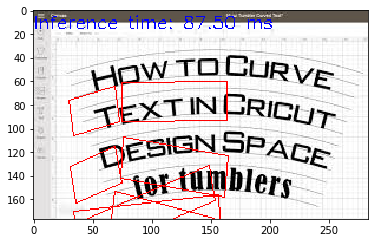

In [44]:
# for i in files:
files = 'download (2).jpeg'
net = cv2.dnn.readNet('frozen_east_text_detection.pb')
image = cv2.imread(files)
orig = image.copy()
image = cv2.resize(image,(320,320),cv2.INTER_AREA)
image.shape
(newW, newH) = (320, 320)
rW = orig.shape[0]/ float(newW)
rH = orig.shape[1]/ float(newH)
blob = cv2.dnn.blobFromImage(image, 1.0, (320, 320), (123.68, 116.78, 103.94), True, False)
import matplotlib.pyplot as plt
plt.imshow(image)
#     plt.show()
outputLayers = []
outputLayers.append("feature_fusion/Conv_7/Sigmoid")
outputLayers.append("feature_fusion/concat_3")
net.setInput(blob)
output = net.forward(outputLayers)
scores = output[0]
geometry = output[1]
from math import *
[boxes, confidences] = decode(scores, geometry, 0.7)
t, _ = net.getPerfProfile()
label = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
indices = cv2.dnn.NMSBoxesRotated(boxes, confidences, 0.6, 0.5)
print(indices)

for i in indices:
    # get 4 corners of the rotated rect
    vertices = cv2.boxPoints(boxes[i[0]])
    # scale the bounding box coordinates based on the respective ratios
    for j in range(4):
        vertices[j][0] *= rW
        vertices[j][1] *= rH
    for j in range(4):
        p1 = (vertices[j][0], vertices[j][1])
        p2 = (vertices[(j + 1) % 4][0], vertices[(j + 1) % 4][1])
        cv2.line(orig, p1, p2, (255, 0, 0), 1);

# Put efficiency information
cv2.putText(orig, label, (0, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

# Display the frame
plt.imshow(orig)
plt.show()

In [ ]:
def draw_boxes(img,image_name,boxes,scale):
   if len(boxes) is not 0: 
      lst1=[]
      lst2=[]
      for box in boxes:
        lst1.append(box[0])
        lst1.append(box[2])
        lst1.append(box[4])
        lst1.append(box[6])
        lst2.append(box[1])
        lst2.append(box[3])
        lst2.append(box[5])
        lst2.append(box[7])
        if box[8]>=0.9:
           color = (0,255,0)
        elif box[8]>=0.8:
           color = (255,0,0)
        #cv2.line(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), color, 2)
        #cv2.line(img, (int(box[0]), int(box[1])), (int(box[4]), int(box[5])), color, 2)
        #cv2.line(img, (int(box[6]), int(box[7])), (int(box[2]), int(box[3])), color, 2)
        #cv2.line(img, (int(box[4]), int(box[5])), (int(box[6]), int(box[7])), color, 2)
       
   
      xmin = min(lst1)
      xmax = max(lst1)
      ymin = min(lst2)
      ymax = max(lst2)

      base_name = image_name.split('/')[-1]
      img2 =img[int(ymin):int(ymax),int(xmin):int(xmax)]
      img=cv2.resize(img, None, None, fx=1.0/scale, fy=1.0/scale, interpolation=cv2.INTER_LINEAR)
      cv2.imwrite(os.path.join("data/results", base_name), img2)
      cv2.imwrite(os.path.join("data/resize", base_name), img)
      #cv2.imshow("crop",img2)
      cv2.waitKey(0)